In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#import the required libraries

train_data=pd.read_csv("train.csv")
#import required data

train_data.head()
train_data.shape



(14999, 9)

In [2]:
#remove the missing values and other things
 
train_data=train_data[train_data.views != "F"]
train_data=train_data[train_data.likes != "F"]
train_data=train_data[train_data.comment != "F"]
train_data=train_data[train_data.dislikes != "F"]
train_data.head()
category={'A':1,'B' :2,'C' :3,'D' :4, 'E' :5,'F':6,'G':7,'H':8}
train_data["category"]=train_data["category"].map(category)
train_data.head()

#covert in numerical values
train_data["views"]=pd.to_numeric(train_data["views"])
train_data["comment"]=pd.to_numeric(train_data["comment"])
train_data["likes"]=pd.to_numeric(train_data["likes"])
train_data["dislikes"]=pd.to_numeric(train_data["dislikes"])
train_data["adview"]=pd.to_numeric(train_data["adview"])
column_vidid=train_data["vidid"]

#encoding features likes durtion,vidid,published.

from sklearn.preprocessing import LabelEncoder
train_data["duration"]=LabelEncoder().fit_transform(train_data["duration"]) 
train_data["vidid"]=LabelEncoder().fit_transform(train_data["vidid"]) 
train_data["published"]=LabelEncoder().fit_transform(train_data["published"]) 
train_data.head()



,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [3]:

#convert time in seconds for duration
import datetime 
import time 
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h)*3600 + int(m)*60 + int(s)

time1=time.apply(func_sec)

train_data["duration"]=time1
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


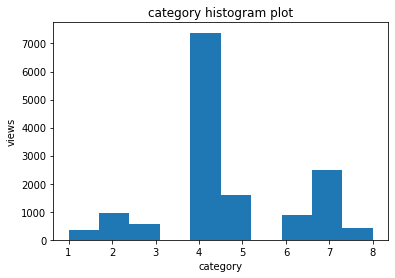

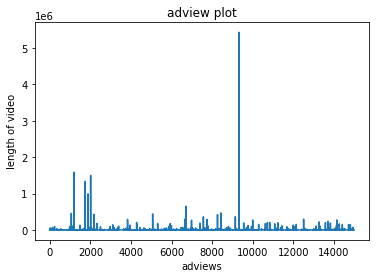

<function matplotlib.pyplot.show>

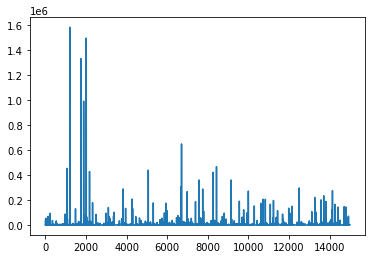

In [4]:

#  Visualise the dataset using plotting using heatmaps and plots.

plt.hist(train_data["category"])
plt.title("category histogram plot")
plt.xlabel("category")
plt.ylabel("views")
plt.show()

plt.plot(train_data["adview"])
plt.title("adview plot")
plt.xlabel("adviews")
plt.ylabel("length of video")
plt.show()

train_data=train_data[train_data["adview"] < 2000000]
plt.plot(train_data["adview"])
plt.show


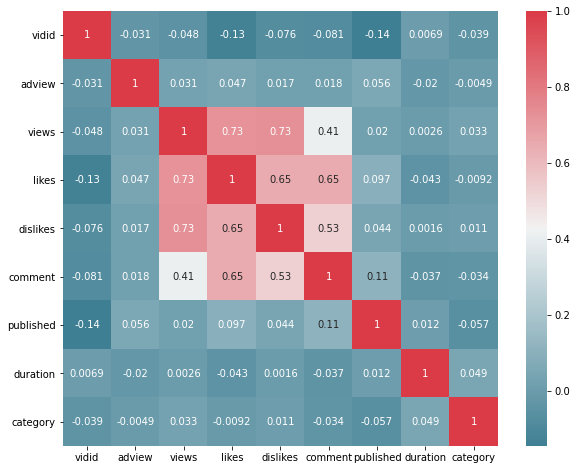

In [5]:
import seaborn as sns
f ,ax = plt.subplots(figsize=(10,8))
corr=train_data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [6]:
#Split dataset in train and test as well as into inputs and outputs
Y_train=pd.DataFrame(data=train_data.iloc[:,1].values,columns=["target"])
train_data=train_data.drop("adview",axis=1)
train_data=train_data.drop("vidid",axis=1)
train_data.head()




,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [9]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,Y_train,test_size=0.2,random_state=42)
x_train.shape

# normalising data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train.mean()

0.1739096800320488

In [10]:

# Use linear regression, support vector regressor, random forest and for training and get errors.

# evaluation metrics
from sklearn import metrics
def print_error(x_test,y_test,model):
  pred=model.predict(x_test)
  print("Mean absolute error:",metrics.mean_absolute_error(y_test,pred))
  print("Mean squared error:",metrics.mean_squared_error(y_test,pred))
  print("Root mean absolute error:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

# Linear Regrssion
from sklearn import linear_model
linear_reg=linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
print_error(x_test,y_test,linear_reg)

#support vector regressor
from sklearn.svm import SVR
supportvector_reggresor=SVR()
supportvector_reggresor.fit(x_train,y_train)
print_error(x_test,y_test,linear_reg)



Mean absolute error: 3707.378005824532
Mean squared error: 835663131.1210337
Root mean absolute error: 28907.83857573986


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error: 3707.378005824532
Mean squared error: 835663131.1210337
Root mean absolute error: 28907.83857573986


In [11]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
print_error(x_test,y_test,decision_tree)

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=400
max_depth=35
min_samples_split=20
max_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)
random_forest.fit(x_train,y_train)
print_error(x_test,y_test,random_forest)



Mean absolute error: 2590.2042349726776
Mean squared error: 879924923.396858
Root mean absolute error: 29663.52850550416


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean absolute error: 3303.603385841778
Mean squared error: 630242158.2834159
Root mean absolute error: 25104.62424103209


In [12]:
#artificial neural network
import keras
from keras.layers import Dense
ann=keras.models.Sequential([
                             Dense(6,activation="relu",
                             input_shape=x_train.shape[1:]),
                             Dense(6 , activation="relu"),
                             Dense(1)
                             ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(x_train,y_train,epochs=100)
ann.summary()
print_error(x_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 14s 1ms/step - loss: 684180301.2555 - mean_squared_error: 684180301.2555
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 1141132375.9101 - mean_squared_error: 1141132375.9101
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 1107548283.3388 - mean_squared_error: 1107548283.3388
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 1075572629.5312 - mean_squared_error: 1075572629.5312
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 393165573.6594 - mean_squared_error: 393165573.6594
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 635089394.4490 - mean_squared_error: 635089394.4490
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 698268741.0281 - mean_squared_error: 698268741.0281
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 818013816.2299 - mean_squared

In [37]:
# saving scikitlearn model
import joblib
joblib.dump(decision_tree,"youtubeadviews.pkl")

# saving artificial neural network model
ann.save("ann_youtubeadview.h5")

In [38]:
data_test = pd.read_csv("/content/test.csv")

In [39]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [40]:
from keras.models import load_model
model = load_model("/content/ann_youtubeadview.h5")

In [41]:
import joblib
modelss=joblib.load("youtubeadviews.pkl")

In [42]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [43]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [44]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [45]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [46]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [48]:
prediction = model.predict(X_test)

In [49]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [50]:
prediction = prediction.rename(columns={0: "Adview"})

In [51]:
prediction.head()

,Adview
0,2260.661133
1,2379.806885
2,1250.953247
3,1098.456177
4,2177.107910


In [52]:

prediction.to_csv('PredictAdview.csv')

In [53]:
pred=modelss.predict(X_test)

In [54]:
pred=pd.DataFrame(pred)
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [55]:
pred = pred.rename(columns={0: "Adview"})

In [56]:
pred.head()

,Adview
0,2.0
1,13.0
2,1.0
3,9.0
4,1.0


In [58]:

pred.to_csv('PredictAdviews_DecisionTree.csv')